# IT420 - Computer Vision
## Assignment 2 - Hough Transform

#### Submitted by : Prince Piyush (2K16/CO/236, Slot - Q) 


### Q1:- Implement Canny edge detector.
### Solution 1

**Canny Edge**:- It is a multi-step algorithm that can detect edges with noise suppressed at the same time. It takes input from the output of the Sobel operator and improves it. The process includes the smoothening of the image using Gaussian Blur. Then, applying the Sobel operator to find edges gradients. And then use thresholds to preserve and discard edges. 

#### Code: 

In [1]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

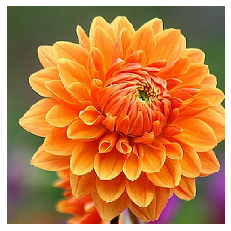

In [2]:
# Load Image 

img = cv2.imread('dahlia.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [3]:
# Finding edges with Canny Edge Detector

edges = cv2.Canny(gray, 100, 200)

In [4]:
# Super Imposing detected edges (green colour) on original Image

img[edges == 255] = [0, 255, 0]

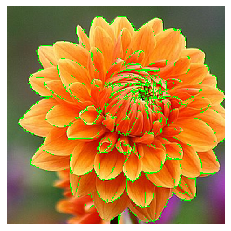

In [5]:
# Showing the Output image with Edges

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:** Here we used the canny edge detector to find the edges in the image and plotted them on the original image. Here, in `cv2.Canny(image, threshold_1, threshold_2)` function we used 3 parameters **(i)** the original image variable, **(ii)** Lower Threshold, and **(iii)** Upper Threshold. The significance of thresholds is that the edges having a weight greater than the upper threshold are definitely included and the edges having weight less than the lower threshold are discarded. but the edges with a weight between the two thresholds are included depending on if they are connected to any edge with a weight greater than the upper Threshold. 

### Q2:- Implement Hough transform to detect lines in the image. Superimpose detected lines on the original image.
### Solution 2

**Hough Transform**:- It is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure.

#### Code: 

In [6]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

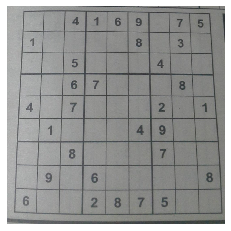

In [7]:
# Load Image 

img = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
# Finding edges with Canny Edge Detector

edges = cv2.Canny(gray, 100, 200)

In [9]:
# Finding lines with Hough Transform using edges detected by Canny Edge Detector

lines = cv2.HoughLines(edges,1,np.pi/180,200)

In [10]:
# Plotting lines on original image  

for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

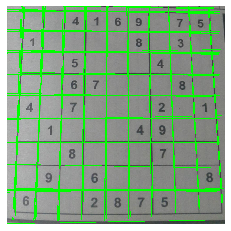

In [11]:
# Showing the Output image with Lines

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:** 

### Q3:- Implement Hough transform to detect circles in the image. Superimpose detected circles on the original image.
### Solution 3

**Hough Transform**:- It is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure.

#### Code: 

In [12]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

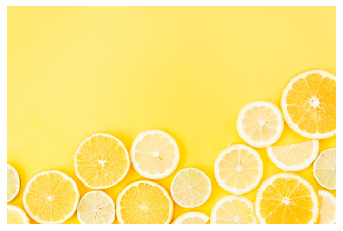

In [13]:
# Load Image 

img = cv2.imread('lemons.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [14]:
# Finding Circles with Hough Transform

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,100,
                            param1=100,param2=30)

In [15]:
# Drawing Circles on original image  

out = img.copy()

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(out,(i[0],i[1]),i[2],(0,255,0),2) # circle
    cv2.circle(out,(i[0],i[1]),2,(0,0,255),3) #center

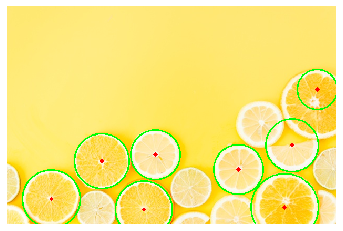

In [16]:
# Showing the Output image with Circles

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:** 

### Q4:- Implement Harris and Stephen operator for corner. Mark detected corners on original image.
### Solution 4

**Harris and Stephen operator**:- The Harris Corner Detector is a mathematical operator that finds features in an image. It is simple to compute, and is fast enough to work on computers. Also, it is popular because it is rotation, scale and illumination variation independent.

#### Code: 

In [17]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

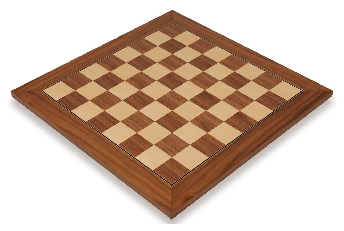

In [18]:
# Load Image 

img = cv2.imread('chess.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [19]:
#Finding Corners using Harris and Stephen Operator

dst = cv2.cornerHarris(gray,2,3,0.04)

# Dilating the Corners to make them visible
dst = cv2.dilate(dst,None)

In [20]:
# Marking corners on original image by thresholding unnecessary small corners

out = img.copy()
out[dst>0.01*dst.max()]=[0,255,0]

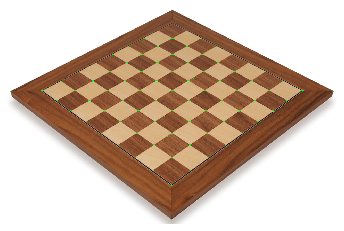

In [21]:
# Showing the Output image with Circles

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:**

### Q5:- Implement full FAST corner detector. Mark detected corners on the original image.
### Solution 5

**FAST corner detector**:- **Features from Accelerated Segment Test (FAST)** It is a corner detection method, which could be used to extract feature points and later used to track and map objects in many computer vision tasks. The FAST corner detector was originally developed by Edward Rosten and Tom Drummond and was published in 2006. The most promising advantage of the FAST corner detector is its computational efficiency. Moreover, when machine learning techniques are applied, superior performance in terms of computation time and resources can be realized. The FAST corner detector is very suitable for real-time video processing application because of this high-speed performance.

#### Code: 

In [22]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

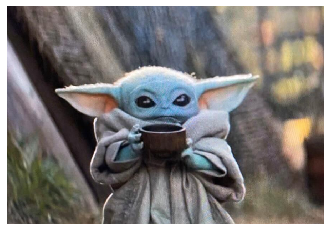

In [23]:
# Load Image 

img = cv2.imread('yoda.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [24]:
# Finding Features using FAST Feature Detector

# Initiate FAST Detector object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(gray,None)

In [25]:
# Marking features on original image

out = img.copy()
out = cv2.drawKeypoints(img, kp, out, color=(0,255,0))

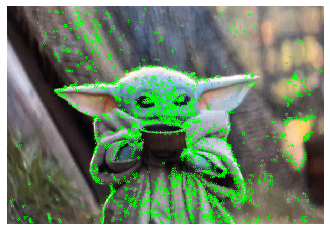

In [26]:
# Showing the Output image with Circles

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:**